In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import zipfile
zf = zipfile.ZipFile('./2298_3884_bundle_archive.zip')
data = pd.read_csv('car_evaluation.csv',names=['price','maintain','doors','persons','boot','safe','decision'])
# data has no headers hence passed headers in read_csv function

In [4]:
# The dependent variable y consists of four string values : unacc, acc, good, vgood
# Mapping them to numbers 
mappings = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}
data['decision'] = data["decision"].map(mappings)

In [5]:
# for 5 or more doors value in dataframe is 5more, replacing it with 5
# for 5 or more persons value in dataframe is more, replacing it with 5
data['doors'] = data['doors'].replace('5more', 5)
data['persons'] = data['persons'].replace('more', 5)

In [6]:
data.head()

,price,maintain,doors,persons,boot,safe,decision
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0



 Higher the decision value better Car ratings.



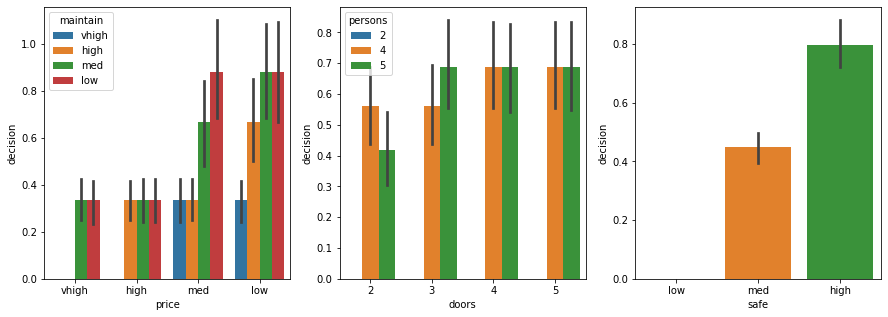

In [49]:
print ('\n Higher the decision value better Car ratings.\n')
fig,axes = plt.subplots(1,3, figsize = (15,5))
sns.barplot(x = 'price', y = 'decision', hue = 'maintain', data = data, ax = axes[0])
sns.barplot(x = 'doors', y = 'decision', hue = 'persons', data = data, ax = axes[1])
sns.barplot(x = 'safe', y = 'decision', data = data, ax = axes[2])
plt.show()

In [7]:
print (data.shape)

(1728, 7)


In [8]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   maintain  1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   boot      1728 non-null   object
 5   safe      1728 non-null   object
 6   decision  1728 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 94.6+ KB
None


In [9]:
X = data.iloc[:,:-1].values
y = data.iloc[:,6].values
print (X.shape)
print (y.shape)

(1728, 6)
(1728,)


In [10]:
# Data preprocessing
# Dataframe consists of strings, using OneHotEncoder to replace them with one hot vectors
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0,1,4,5])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
print (X.shape)

(1728, 16)


In [125]:
# Splitting into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [137]:
# Training a SVM Classifier
from sklearn.svm import SVC
svmclassifier = SVC(kernel = 'rbf')
svmclassifier.fit(X_train, y_train)

SVC()

In [139]:
# Training a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forestclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
forestclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [140]:
# Predictions
y_pred_svm = svmclassifier.predict(X_test)
y_pred_forest = forestclassifier.predict(X_test)

In [141]:
# Classification Reports
from sklearn.metrics import classification_report
target_classes = ["unacc", "acc", "good", "vgood"]
print ('Classification report for SVM Classifier : \n\n')
print (classification_report(y_test, y_pred_svm, target_names=target_classes))
print ('\n\nClassification report for Random Forest Classifier : \n\n')
print (classification_report(y_test, y_pred_forest, target_names=target_classes))

Classification report for SVM Classifier : 


              precision    recall  f1-score   support

       unacc       0.99      0.96      0.97       295
         acc       0.67      0.96      0.79        94
        good       0.00      0.00      0.00        21
       vgood       0.89      0.36      0.52        22

    accuracy                           0.88       432
   macro avg       0.64      0.57      0.57       432
weighted avg       0.86      0.88      0.86       432



Classification report for Random Forest Classifier : 


              precision    recall  f1-score   support

       unacc       0.99      0.98      0.98       295
         acc       0.94      0.94      0.94        94
        good       0.94      0.81      0.87        21
       vgood       0.85      1.00      0.92        22

    accuracy                           0.97       432
   macro avg       0.93      0.93      0.93       432
weighted avg       0.97      0.97      0.97       432



/home/shreyas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


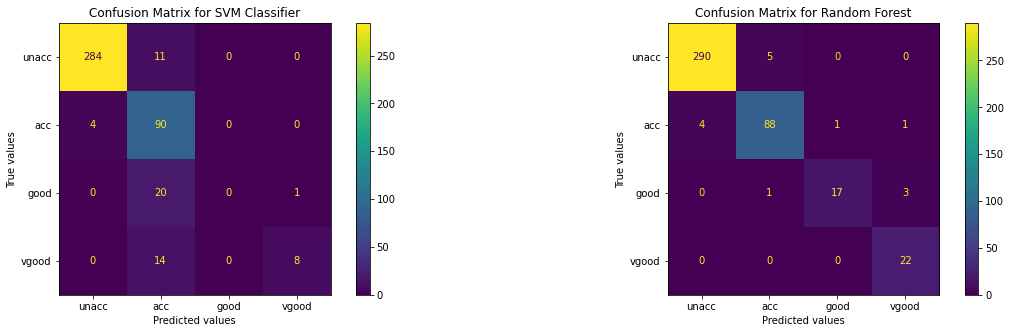

In [147]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f,axes = plt.subplots(1,2, figsize=(20,5))
labels = ['unacc', 'acc', 'good', 'vgood']

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(cm_svm, display_labels=labels)
disp_svm.plot(ax = axes[0])
disp_svm.ax_.set_title('Confusion Matrix for SVM Classifier')
disp_svm.ax_.set_xlabel('Predicted values')
disp_svm.ax_.set_ylabel('True values')

cm_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(cm_forest, display_labels=labels)
disp_forest.plot(ax = axes[1])
disp_forest.ax_.set_title('Confusion Matrix for Random Forest')
disp_forest.ax_.set_xlabel('Predicted values')
disp_forest.ax_.set_ylabel('True values')

plt.show()

In [150]:
# Accuracy Scores
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred_svm)
print ('Accuracy Score on Testing Set for SVM Classifier : {}\n'.format(score))
score = accuracy_score(y_test, y_pred_forest)
print ('Accuracy Score on Testing Set for Random Forest Classifier : {}'.format(score))

Accuracy Score on Testing Set for SVM Classifier : 0.8842592592592593

Accuracy Score on Testing Set for Random Forest Classifier : 0.9652777777777778
